# LSTM SUR LES STOCKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from notify_run import Notify # pour m'envoyer des notification

In [2]:
notify = Notify()
notify.register()

Endpoint: https://notify.run/1y8g1bWpnzCFH7Oi
To subscribe, open: https://notify.run/c/1y8g1bWpnzCFH7Oi
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

### Importation des données

In [3]:
amzn = pd.read_csv('amazon.csv')
goog = pd.read_csv('google.csv')
msft = pd.read_csv('microsoft.csv')


In [4]:
amzn

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,160.01,160.93,155.60,157.06,7606000,0,0
1,2010-10-01,157.08,157.44,152.20,153.71,8683400,0,0
2,2010-10-04,153.95,155.96,152.79,155.39,5346500,0,0
3,2010-10-05,157.08,161.21,157.01,160.87,5620000,0,0
4,2010-10-06,160.60,160.68,154.60,155.40,6060800,0,0
...,...,...,...,...,...,...,...,...
2514,2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,0,0
2515,2020-09-28,3148.85,3175.04,3117.17,3174.05,4224200,0,0
2516,2020-09-29,3175.39,3188.26,3132.54,3144.88,3495800,0,0
2517,2020-09-30,3141.14,3212.88,3133.99,3148.73,4883400,0,0


In [5]:
goog

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,263.59,264.94,258.49,261.91,6512400,0,0.0
1,2010-10-01,264.01,264.32,260.52,261.83,4466600,0,0.0
2,2010-10-04,261.49,263.14,258.46,260.20,3895400,0,0.0
3,2010-10-05,263.20,268.99,262.29,268.11,7040400,0,0.0
4,2010-10-06,268.62,268.97,263.98,266.18,5545200,0,0.0
...,...,...,...,...,...,...,...,...
2514,2020-09-25,1432.63,1450.00,1413.34,1444.96,1323000,0,0.0
2515,2020-09-28,1474.21,1476.80,1449.30,1464.52,2007900,0,0.0
2516,2020-09-29,1470.39,1476.66,1458.81,1469.33,978200,0,0.0
2517,2020-09-30,1466.80,1489.75,1459.88,1469.60,1700600,0,0.0


In [6]:
msft

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,19.50,19.67,19.30,19.40,61262700,0.0,0
1,2010-10-01,19.62,19.66,19.25,19.32,62672300,0.0,0
2,2010-10-04,18.98,19.01,18.84,18.94,98143400,0.0,0
3,2010-10-05,19.06,19.37,18.94,19.29,78152900,0.0,0
4,2010-10-06,19.27,19.44,19.12,19.36,50489700,0.0,0
...,...,...,...,...,...,...,...,...
2514,2020-09-25,203.55,209.04,202.54,207.82,29437300,0.0,0
2515,2020-09-28,210.88,212.57,208.06,209.44,32004900,0.0,0
2516,2020-09-29,209.35,210.07,206.81,207.26,24221900,0.0,0
2517,2020-09-30,207.73,211.98,206.54,210.33,33780700,0.0,0


## Datavisualisation et EDA

In [7]:
goog.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03,2519.0,2519.000000
mean,730.331016,736.950655,723.612823,730.541711,2.952375e+06,0.0,0.001192
std,364.503748,368.640291,360.820660,364.974511,2.461120e+06,0.0,0.044581
min,236.110000,239.480000,235.630000,236.550000,7.900000e+03,0.0,0.000000
25%,402.420000,406.165000,400.750000,403.475000,1.393300e+06,0.0,0.000000
50%,654.660000,661.380000,644.200000,651.790000,2.030500e+06,0.0,0.000000
75%,1056.500000,1069.270000,1045.065000,1056.215000,3.968400e+06,0.0,0.000000
max,1709.710000,1733.180000,1666.330000,1728.280000,2.976060e+07,0.0,2.002000


In [8]:
amzn.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2519.000000,2519.000000,2519.000000,2519.00000,2.519000e+03,2519.0,2519.0
mean,855.352946,864.352688,845.264752,855.29869,4.327559e+06,0.0,0.0
std,746.762844,755.505979,736.743729,746.52583,2.410213e+06,0.0,0.0
min,152.510000,155.960000,151.400000,153.03000,8.813000e+05,0.0,0.0
25%,266.715000,269.440000,263.775000,266.45000,2.769900e+06,0.0,0.0
50%,534.480000,539.390000,526.600000,533.75000,3.711600e+06,0.0,0.0
75%,1495.350000,1526.080000,1478.710000,1500.12500,5.112500e+06,0.0,0.0
max,3547.000000,3552.250000,3486.690000,3531.45000,2.413420e+07,0.0,0.0


In [9]:
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03,2519.000000,2519.0
mean,64.347892,64.955633,63.708321,64.370457,3.813232e+07,0.005272,0.0
std,48.655804,49.219111,48.037623,48.665061,2.129780e+07,0.043757,0.0
min,18.980000,19.010000,18.840000,18.940000,7.425600e+06,0.000000,0.0
25%,26.470000,26.690000,26.290000,26.460000,2.405035e+07,0.000000,0.0
50%,43.300000,43.690000,42.930000,43.280000,3.286020e+07,0.000000,0.0
75%,90.820000,91.775000,89.765000,90.605000,4.718770e+07,0.000000,0.0
max,229.270000,232.860000,227.350000,231.650000,3.193179e+08,0.510000,0.0


In [10]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2519 non-null   object 
 1   Open          2519 non-null   float64
 2   High          2519 non-null   float64
 3   Low           2519 non-null   float64
 4   Close         2519 non-null   float64
 5   Volume        2519 non-null   int64  
 6   Dividends     2519 non-null   int64  
 7   Stock Splits  2519 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 157.6+ KB


In [11]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2519 non-null   object 
 1   Open          2519 non-null   float64
 2   High          2519 non-null   float64
 3   Low           2519 non-null   float64
 4   Close         2519 non-null   float64
 5   Volume        2519 non-null   int64  
 6   Dividends     2519 non-null   float64
 7   Stock Splits  2519 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 157.6+ KB


In [12]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2519 non-null   object 
 1   Open          2519 non-null   float64
 2   High          2519 non-null   float64
 3   Low           2519 non-null   float64
 4   Close         2519 non-null   float64
 5   Volume        2519 non-null   int64  
 6   Dividends     2519 non-null   int64  
 7   Stock Splits  2519 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.6+ KB


In [13]:
# on va créer une colonne représente la moyenne de la valeur haute et basse
msft['Mean_Price'] = (msft['Low']+msft['High'])/2.0
goog['Mean_Price'] = (goog ['Low']+goog['High'])/2.0
amzn['Mean_Price'] = (amzn['Low']+amzn['High'])/2.0

In [14]:
# On va sauver ces dataframes en un nouveau dataframe
msft.to_csv('microsoft2.csv')
goog.to_csv('google2.csv')
amzn.to_csv('amazon2.csv')

In [15]:
# on met la date en index
amzn.index = amzn.Date
goog.index = goog.Date
msft.index = msft.Date

In [16]:
# On supprime la colonne date
amzn = amzn.drop("Date", axis = 1)
goog = goog.drop("Date", axis = 1)
msft = msft.drop("Date", axis = 1)

In [17]:
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean_Price
Date,,,,,,,,
2010-09-30,19.50,19.67,19.30,19.40,61262700,0.0,0,19.485
2010-10-01,19.62,19.66,19.25,19.32,62672300,0.0,0,19.455
2010-10-04,18.98,19.01,18.84,18.94,98143400,0.0,0,18.925
2010-10-05,19.06,19.37,18.94,19.29,78152900,0.0,0,19.155
2010-10-06,19.27,19.44,19.12,19.36,50489700,0.0,0,19.280
...,...,...,...,...,...,...,...,...
2020-09-25,203.55,209.04,202.54,207.82,29437300,0.0,0,205.790
2020-09-28,210.88,212.57,208.06,209.44,32004900,0.0,0,210.315
2020-09-29,209.35,210.07,206.81,207.26,24221900,0.0,0,208.440


In [18]:
# On va concaténer les dataframes
tech_list = ['GOOG', 'MSFT', 'AMZN']
company_list = [goog, msft, amzn]
company_name = ["GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean_Price,company_name
Date,,,,,,,,,
2020-09-18,3031.74,3037.80,2905.54,2954.91,8892600,0.0,0.0,2971.670,AMAZON
2020-09-21,2906.50,2962.00,2871.00,2960.47,6117900,0.0,0.0,2916.500,AMAZON
2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,0.0,0.0,3067.095,AMAZON
2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,0.0,0.0,3059.690,AMAZON
2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,0.0,0.0,3017.150,AMAZON
2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,0.0,0.0,3050.270,AMAZON
2020-09-28,3148.85,3175.04,3117.17,3174.05,4224200,0.0,0.0,3146.105,AMAZON
2020-09-29,3175.39,3188.26,3132.54,3144.88,3495800,0.0,0.0,3160.400,AMAZON
2020-09-30,3141.14,3212.88,3133.99,3148.73,4883400,0.0,0.0,3173.435,AMAZON


### Quelle a été la variation du prix?

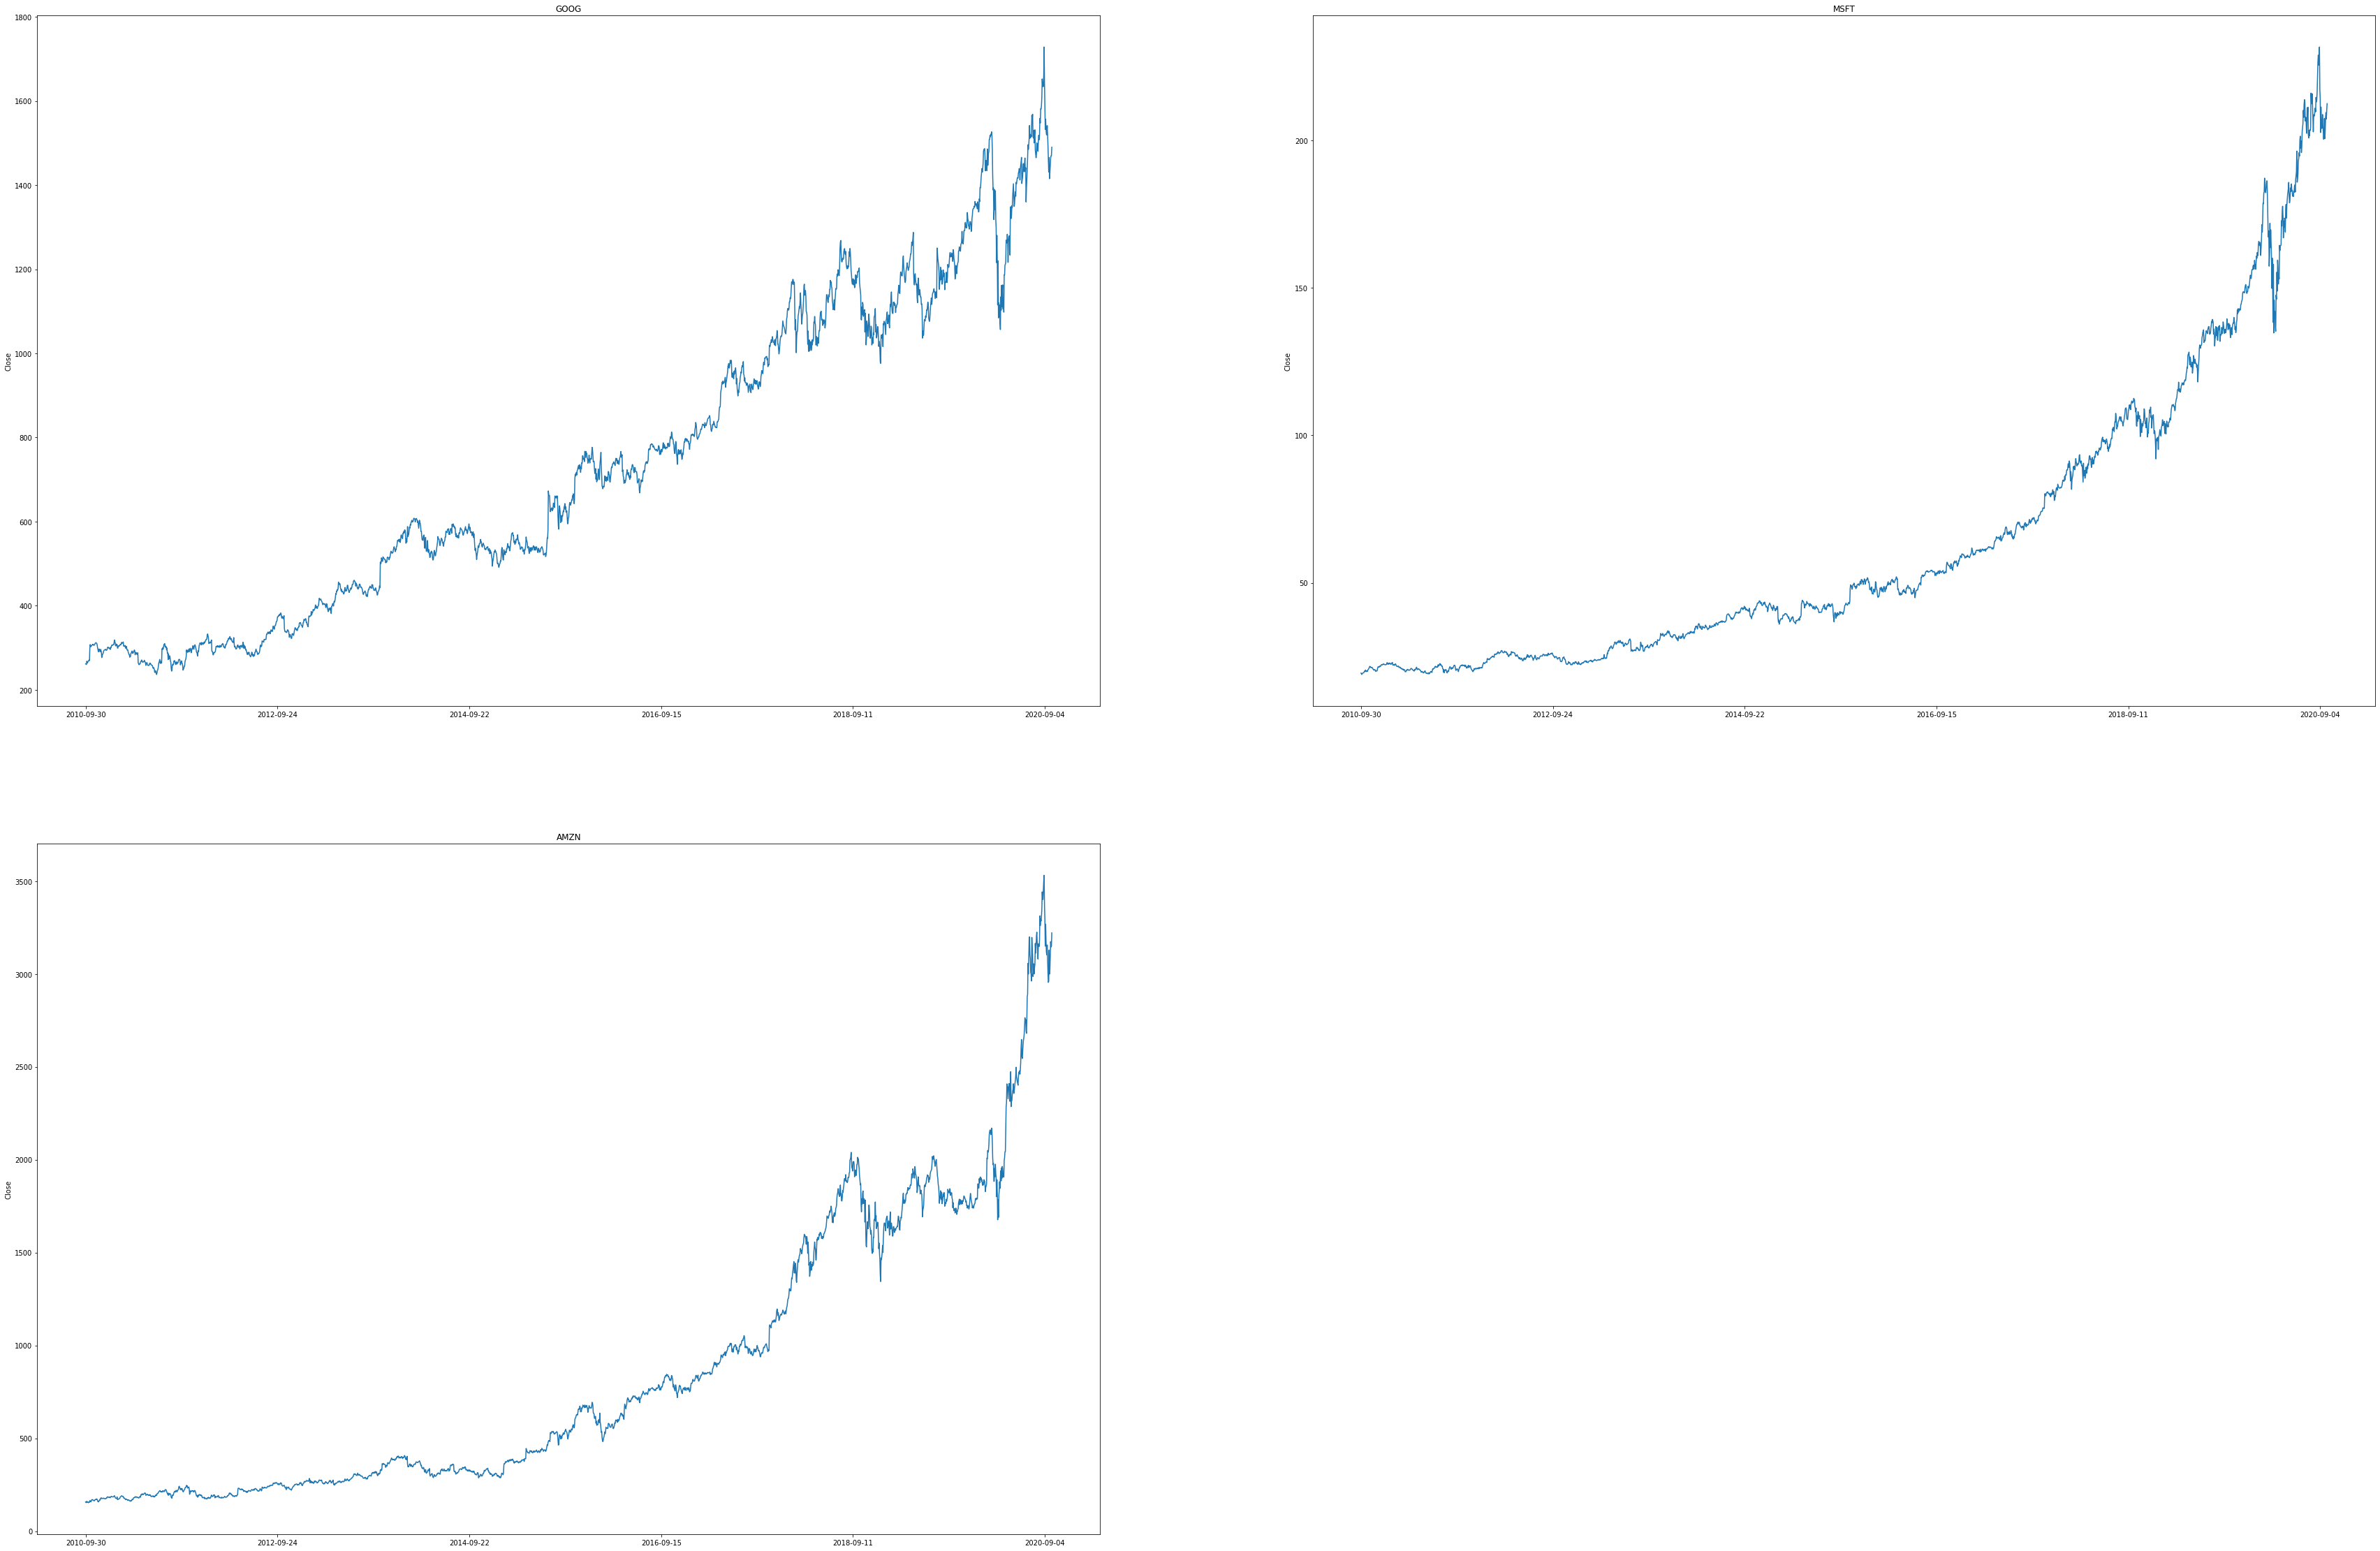

In [19]:
# On va  voir l'évolution du prix de fermeture
plt.figure(figsize=(60, 40))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

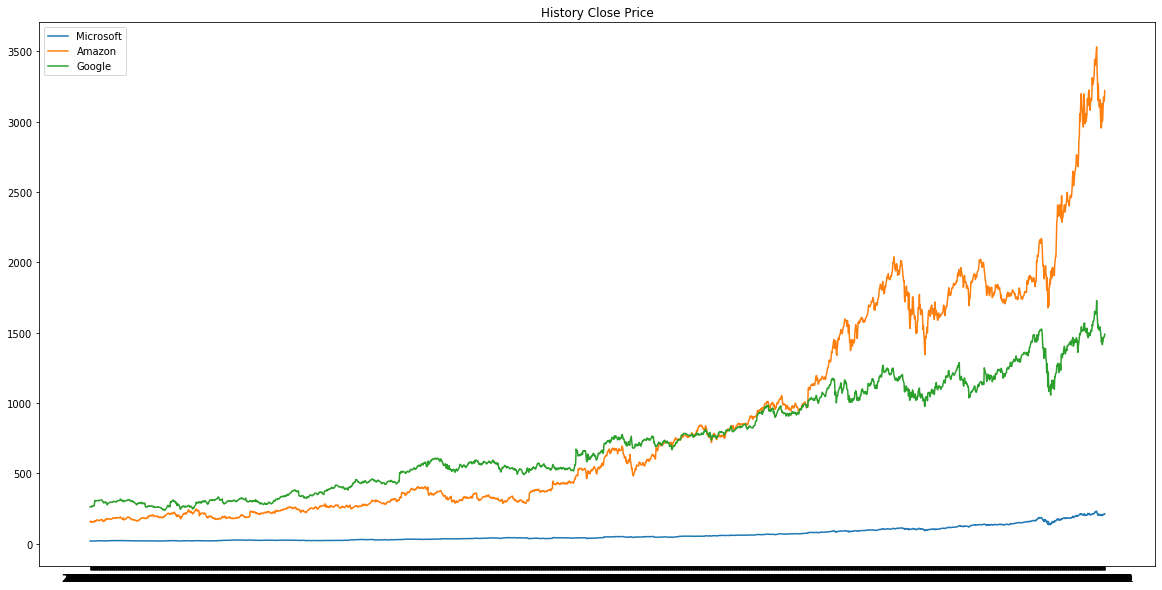

In [20]:
# Voyons les graphs superposer
plt.figure(figsize = (20, 10))
plt.plot(msft['Close'], label = 'Microsoft')
plt.plot(amzn['Close'], label = 'Amazon')
plt.plot(goog['Close'], label = 'Google')
plt.title("History Close Price")
plt.legend(loc='best')
plt.show()

On peut remarquer que le prix de Google évolue lentement contrairement au deux autres entreprises. Microsoft était au dessus d'Amazon qui à prit le dessus. On voit bien que le prix est plus élevé mais instable contrairement à Microsoft qui certe évolue moins vite mais du coup chute moins vite.

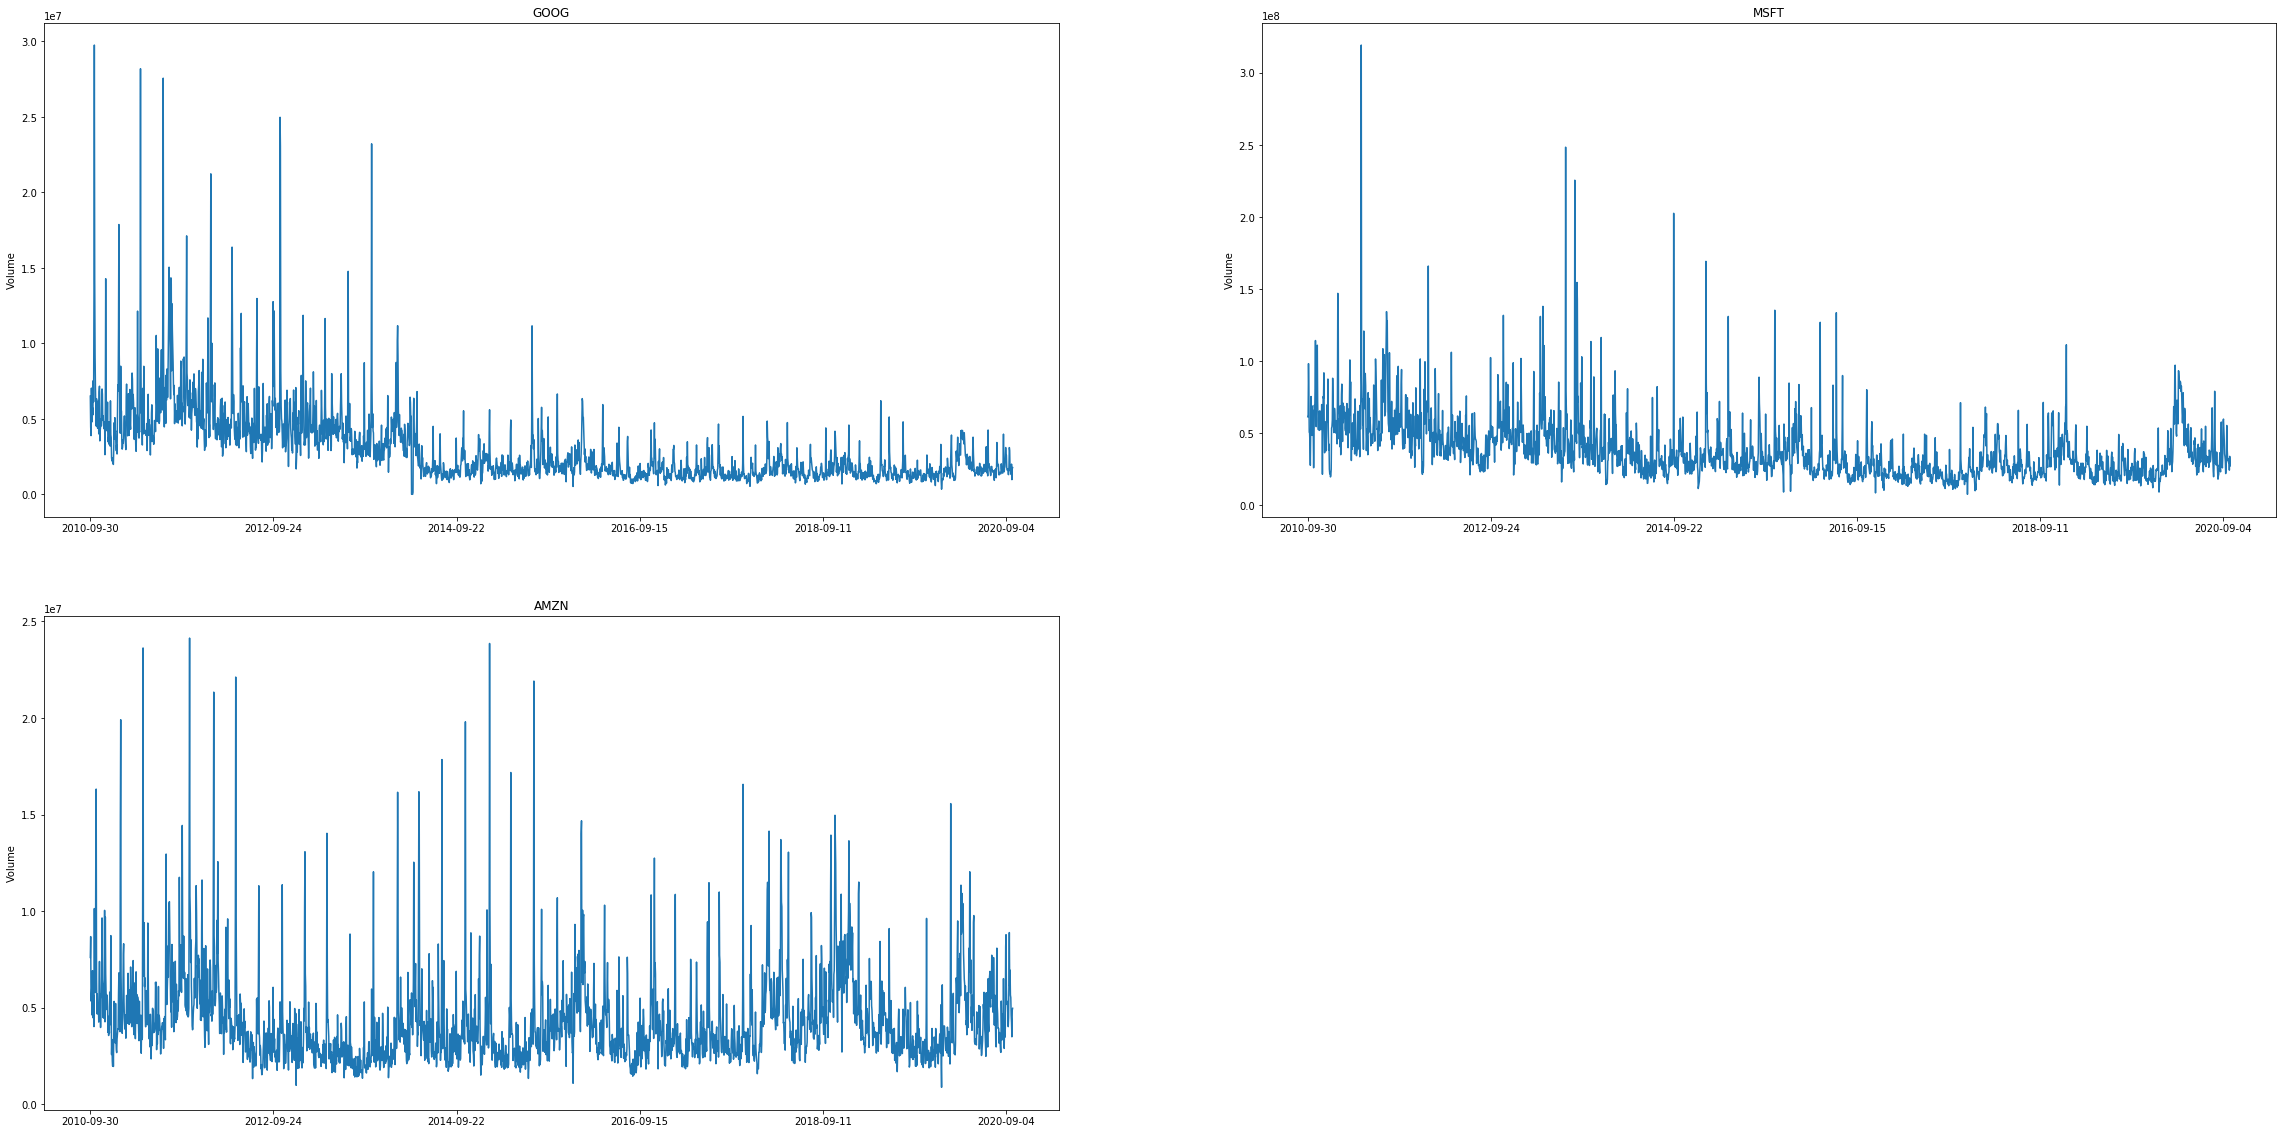

In [21]:
# Maintenant, traçons le volume total des actions échangées chaque jour
plt.figure(figsize=(40, 20))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

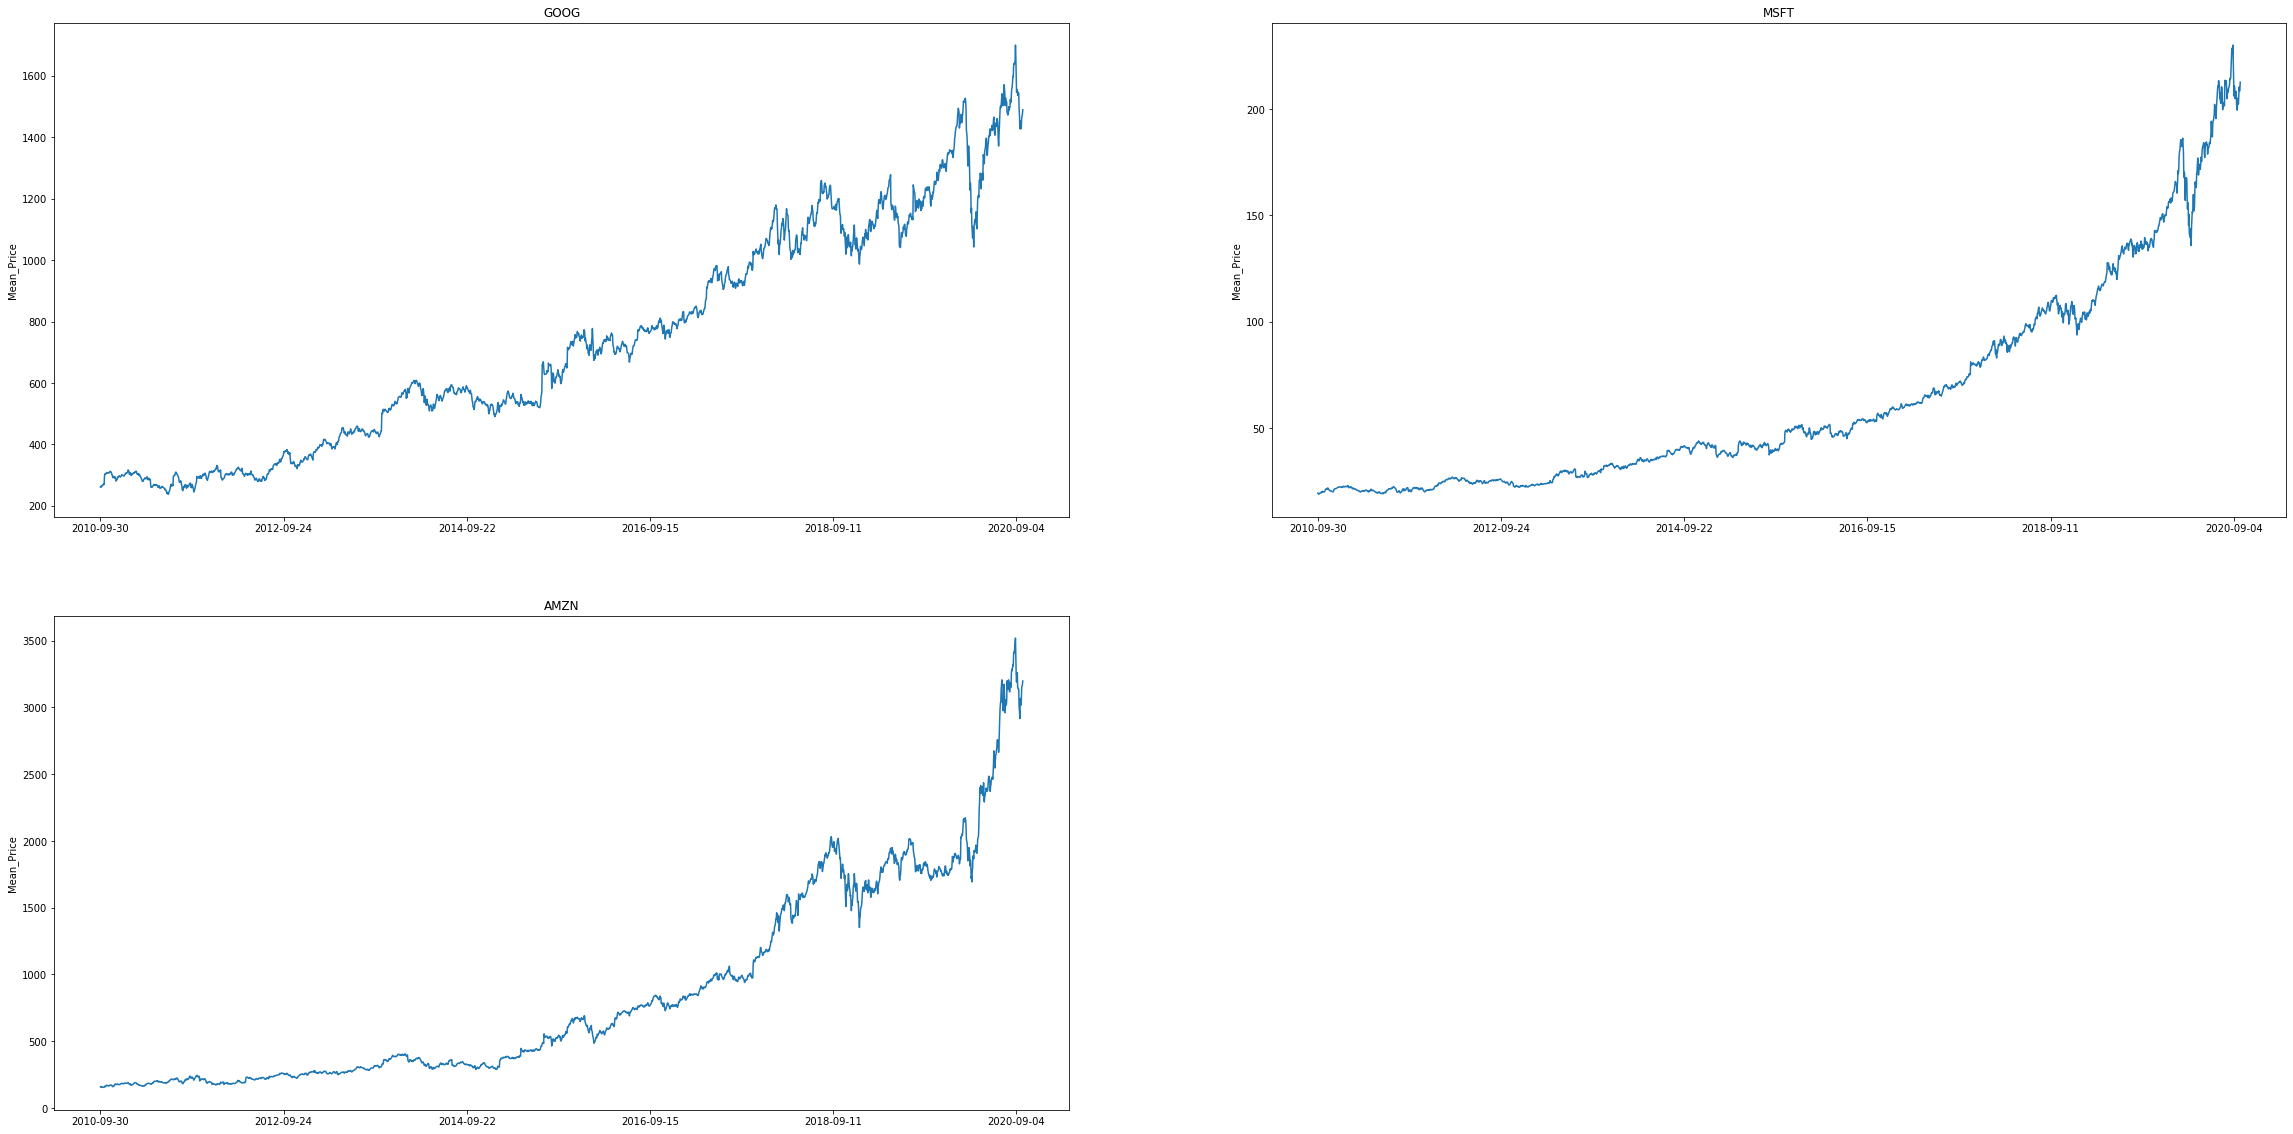

In [22]:
# Maintenant, traçons le prix moyen des actions 

plt.figure(figsize=(40, 20))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Mean_Price'].plot()
    plt.ylabel('Mean_Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

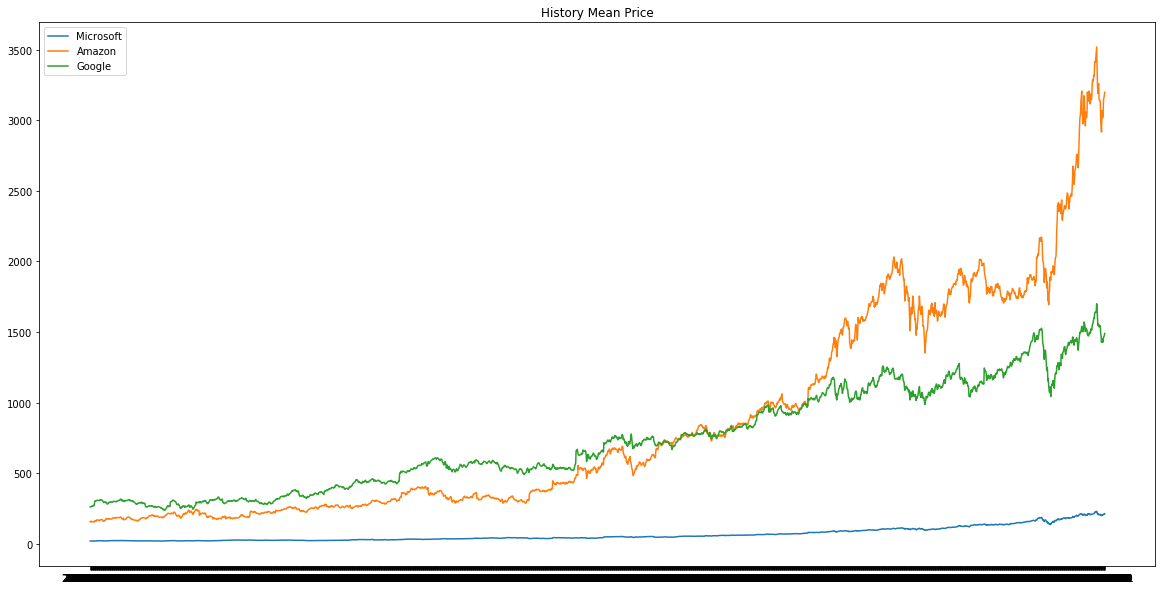

In [23]:
# Superpossons les courbes du prix moyen des actions da chaque entreprise
plt.figure(figsize = (20, 10))
plt.plot(msft['Mean_Price'], label = 'Microsoft')
plt.plot(amzn['Mean_Price'], label = 'Amazon')
plt.plot(goog['Mean_Price'], label = 'Google')
plt.title("History Mean Price")
plt.legend(loc='best')
plt.show()

### Quelle est la moyenne mobile des différentes actions?


In [24]:

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA sur {ma} jours"
        company[column_name] = company['Close'].rolling(ma).mean()

In [25]:
print(goog.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Mean_Price', 'company_name', 'MA sur 10 jours', 'MA sur 20 jours',
       'MA sur 50 jours'],
      dtype='object')


company_name
AMAZON       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
GOOGLE       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
MICROSOFT    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

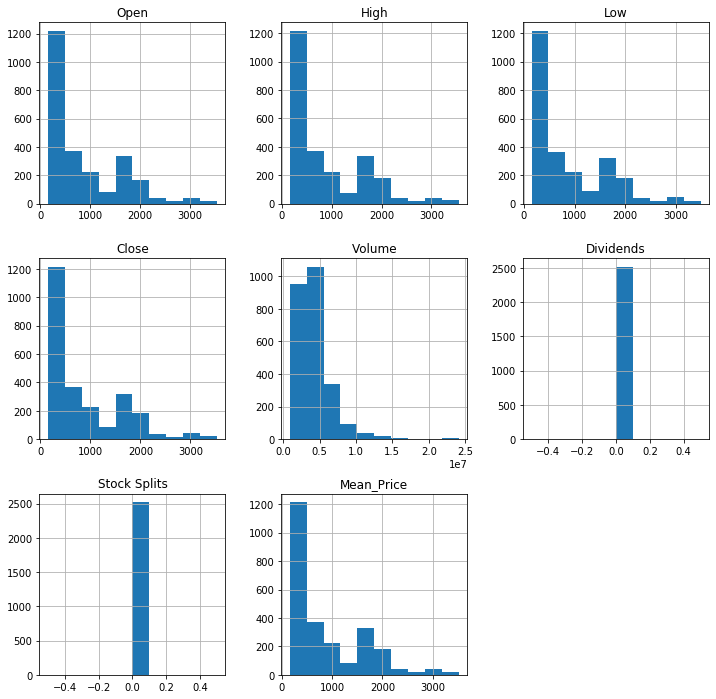

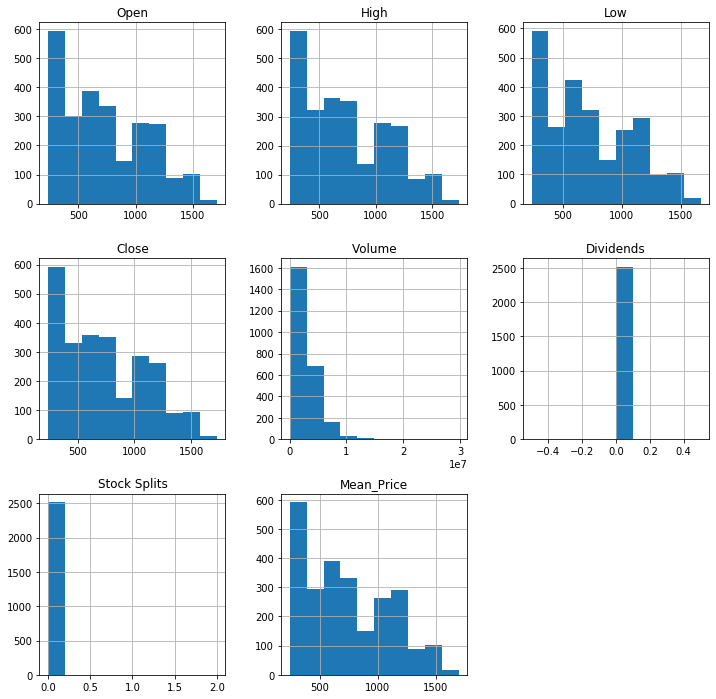

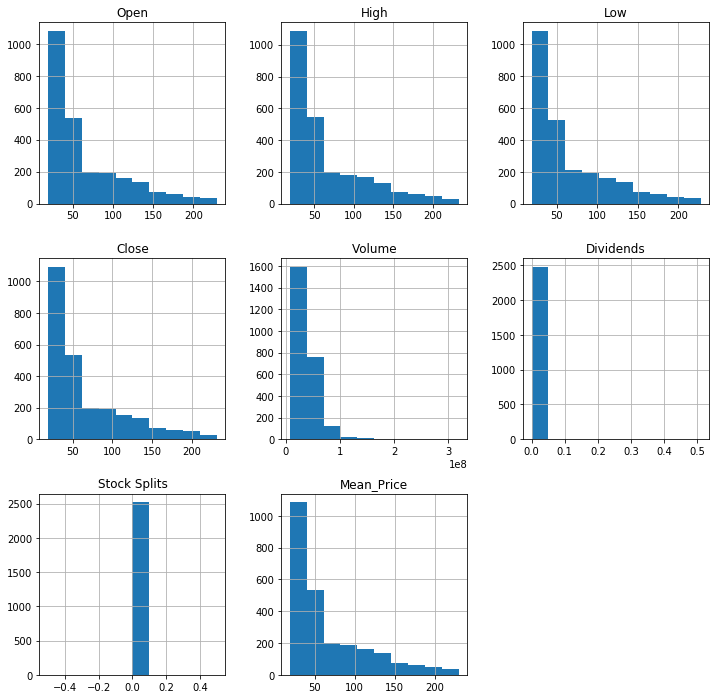

In [26]:
# Maintenant,nous allons tracer toutes les moyennes mobiles supplémentaires
df.groupby("company_name").hist(figsize=(12, 12))

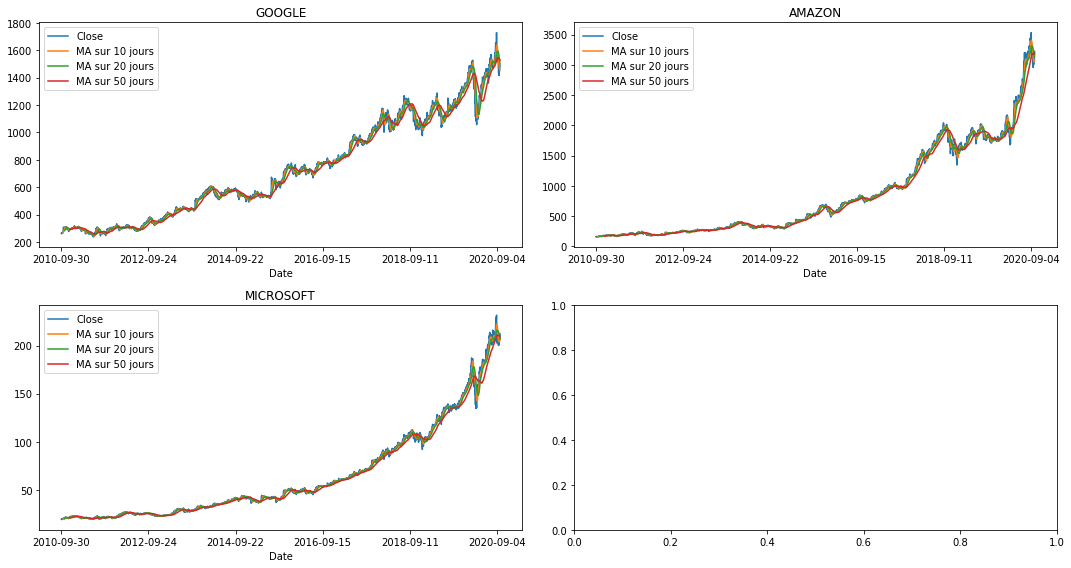

In [27]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

goog[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[0,0])
axes[0,0].set_title('GOOGLE')

msft[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

amzn[['Close', 'MA sur 10 jours', 'MA sur 20 jours', 'MA sur 50 jours']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

fig.tight_layout()

### Quel a été le rendement quotidien du stock en moyenne?

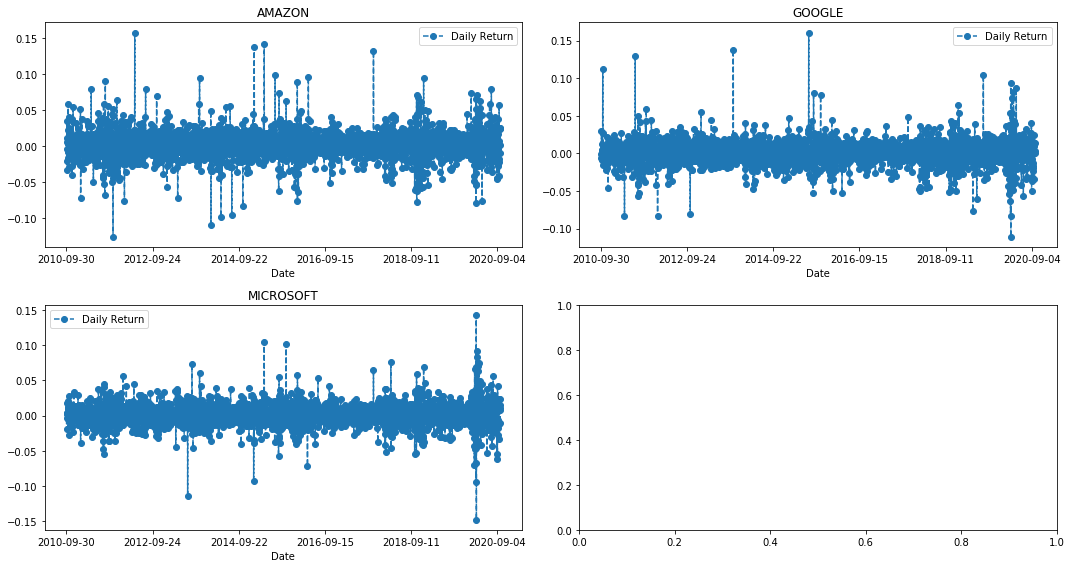

In [28]:
# Nous utiliserons pct_change pour trouver le pourcentage de changement pour chaque jour
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Ensuite, nous tracerons le pourcentage de retour quotidien
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


goog['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

msft['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

amzn['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

fig.tight_layout()

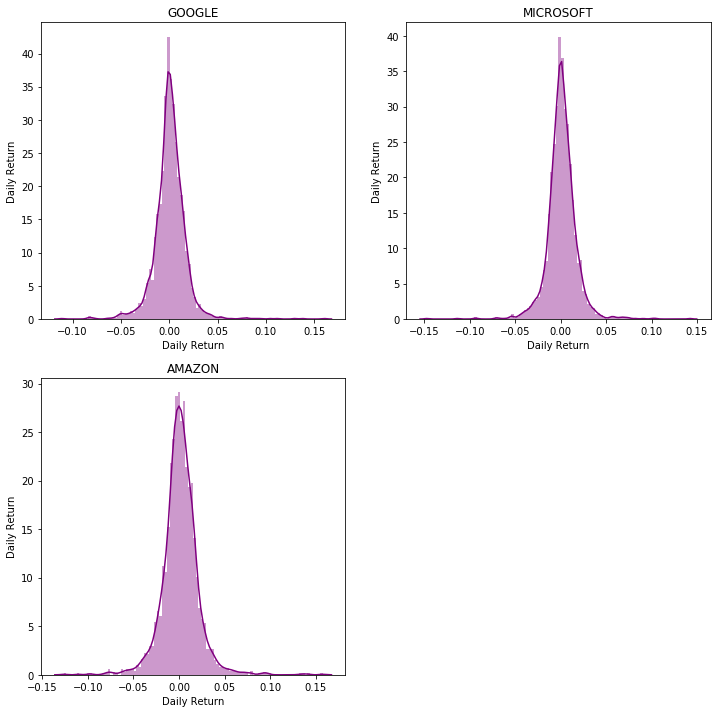

In [29]:
'''  Examinons maintenant le rendement quotidien moyen à l'aide d'un histogramme. 
Nous utiliserons seaborn pour créer à la fois un histogramme et un tracé kde sur la même figure'''
# Notez l'utilisation de dropna() ici, sinon les valeurs NaN ne peuvent pas être lues par seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

### Quelle était la corrélation entre les différents cours de clôture des actions?

In [30]:
# Pour analyser les rendements de toutes les actions de notre liste nous devons construir un DataFrame avec toutes les colonnes ['Close'] pour chacun des dataframes des stocks.
concat= amzn.merge(goog, how = 'inner', on = 'Date', left_index = True)

In [31]:
concat = concat.merge(msft, how = 'inner', on = 'Date', left_index = True)

In [32]:
concat

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Mean_Price_x,company_name_x,MA sur 10 jours_x,...,Close,Volume,Dividends,Stock Splits,Mean_Price,company_name,MA sur 10 jours,MA sur 20 jours,MA sur 50 jours,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-30,160.01,160.93,155.60,157.06,7606000,0,0,158.265,AMAZON,NaN,...,19.40,61262700,0.0,0,19.485,MICROSOFT,NaN,NaN,NaN,NaN
2010-10-01,157.08,157.44,152.20,153.71,8683400,0,0,154.820,AMAZON,NaN,...,19.32,62672300,0.0,0,19.455,MICROSOFT,NaN,NaN,NaN,-0.004124
2010-10-04,153.95,155.96,152.79,155.39,5346500,0,0,154.375,AMAZON,NaN,...,18.94,98143400,0.0,0,18.925,MICROSOFT,NaN,NaN,NaN,-0.019669
2010-10-05,157.08,161.21,157.01,160.87,5620000,0,0,159.110,AMAZON,NaN,...,19.29,78152900,0.0,0,19.155,MICROSOFT,NaN,NaN,NaN,0.018479
2010-10-06,160.60,160.68,154.60,155.40,6060800,0,0,157.640,AMAZON,NaN,...,19.36,50489700,0.0,0,19.280,MICROSOFT,NaN,NaN,NaN,0.003629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,0,0,3050.270,AMAZON,3050.508,...,207.82,29437300,0.0,0,205.790,MICROSOFT,204.410,210.6180,210.1096,0.022787
2020-09-28,3148.85,3175.04,3117.17,3174.05,4224200,0,0,3146.105,AMAZON,3057.616,...,209.44,32004900,0.0,0,210.315,MICROSOFT,204.813,209.6445,210.2506,0.007795
2020-09-29,3175.39,3188.26,3132.54,3144.88,3495800,0,0,3160.400,AMAZON,3056.491,...,207.26,24221900,0.0,0,208.440,MICROSOFT,204.661,208.7310,210.1740,-0.010409


In [33]:
mean_price = concat[['Mean_Price_x', 'Mean_Price_y', 'Mean_Price']]
mean_price

,Mean_Price_x,Mean_Price_y,Mean_Price
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280
...,...,...,...
2020-09-25,3050.270,1431.670,205.790
2020-09-28,3146.105,1463.050,210.315
2020-09-29,3160.400,1467.735,208.440


In [34]:
mean_price.rename(columns={'Mean_Price_x': 'Mean_Price Amazon', 'Mean_Price_y': 'Mean_Price Google', 'Mean_Price': 'Mean_Price Microsoft'}, inplace=True)

C:\Users\ouizb\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
mean_price

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280
...,...,...,...
2020-09-25,3050.270,1431.670,205.790
2020-09-28,3146.105,1463.050,210.315
2020-09-29,3160.400,1467.735,208.440


In [36]:
# Nouveau DataFrame avec le pourcentage de changement pour chaque jour
tech_rets = mean_price.pct_change()
tech_rets

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,NaN,NaN,NaN
2010-10-01,-0.021767,0.002694,-0.001540
2010-10-04,-0.002874,-0.006173,-0.027242
2010-10-05,0.030672,0.018558,0.012153
2010-10-06,-0.009239,0.003143,0.006526
...,...,...,...
2020-09-25,0.010977,0.003427,0.016824
2020-09-28,0.031419,0.021918,0.021988
2020-09-29,0.004544,0.003202,-0.008915


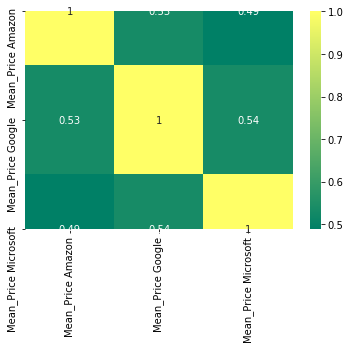

In [37]:
# Matrice de corrélation  pour les rendements quotidiens
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

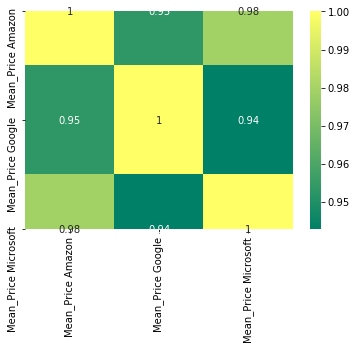

In [38]:
# Matrice de corrélation  pour les prix moyens
sns.heatmap(mean_price.corr(), annot=True, cmap='summer')

Les corrélation sont fortement positives entre les 3 entreprises. Las courbes des prix moyens le montre bien on peut observé des pic de hausse ou de baisse simultané aux la même périodes pour Amazon et Microsoft. C'est moins visible pour Google. 